In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Load .h5 file to get access to dataset</h2>

In [0]:
import tensorflow as tf
import h5py

In [5]:
h5_file = h5py.File('/content/gdrive/My Drive/AIML/Projects/DeepLearning2/SVHN_single_grey1.h5','r')
list(h5_file.keys())


['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
x_test = h5_file['X_test']
x_train = h5_file['X_train']
y_test = h5_file['y_test']
y_train = h5_file['y_train']
x_val = h5_file['X_val']
y_val = h5_file['y_val']

<h3>Inspect shapes of training and test set </h3>

In [8]:
x_train.shape

(42000, 32, 32)

In [9]:
y_train.shape

(42000,)

In [10]:
x_test.shape

(18000, 32, 32)

In [11]:
y_test.shape

(18000,)

In [12]:
x_val.shape

(60000, 32, 32)

In [13]:
y_val.shape

(60000,)

<h3>Spot check images in training set</h3>

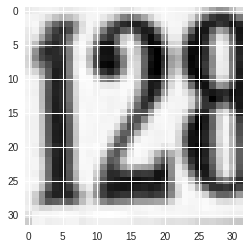

In [14]:
plt.imshow(x_train[0])

In [15]:
y_train[0]

2

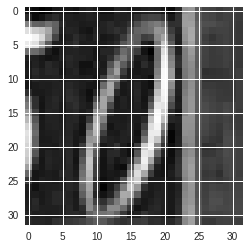

In [16]:
plt.imshow(x_train[278])

In [17]:
y_train[278]

0

<h3>View images in test set</h3>

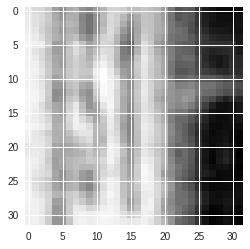

In [18]:
plt.imshow(x_test[0])

In [19]:
y_test[0]

1

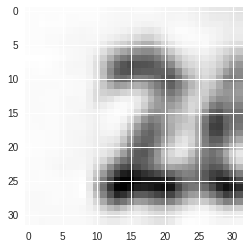

In [20]:
plt.imshow(x_test[17999])

In [21]:
y_test[17999]

2

<h3>Analyzing the DataSet object and converting to np array</h3>

In [22]:
x_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [23]:
x_train.shape

(42000, 32, 32)

In [24]:
x_train[0].shape

(32, 32)

In [0]:
x_tr = np.array(x_train)

In [0]:
x_tr = x_tr.reshape(42000,32*32)

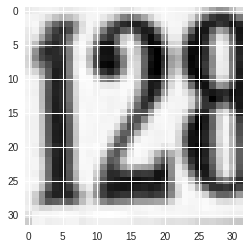

In [27]:
plt.imshow(x_train[0])

In [28]:
x_tr.shape

(42000, 1024)

In [29]:
y_tr = np.array(y_train)
print(y_tr.shape)
y_tr = y_tr.reshape(42000,1)

(42000,)


In [30]:
y_tr.shape

(42000, 1)

In [31]:
x_te = np.array(x_test)
print(x_te.shape)
x_te = x_te.reshape(18000,32*32)
print(x_te.shape)

(18000, 32, 32)
(18000, 1024)


In [32]:
y_te = np.array(y_test)
print(y_te.shape)
y_te = y_te.reshape(18000,1)
print(y_te.shape)

(18000,)
(18000, 1)


In [33]:
x_va = np.array(x_val)
print(x_va.shape)
x_va = x_va.reshape(60000,32*32)
print(x_va.shape)

(60000, 32, 32)
(60000, 1024)


In [34]:
y_va = np.array(y_val)
print(y_va.shape)
y_va = y_va.reshape(60000,1)
print(y_va.shape)

(60000,)
(60000, 1)


<h2>KNN Classifier</h2>

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [0]:
x_tr = x_tr/255


In [0]:
x_va = x_va/255

In [0]:
x_te = x_te/255

In [39]:
x_tr[0]

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)

In [40]:
y_tr[0]

array([2], dtype=uint8)

In [41]:
y_tr.ravel().shape

(42000,)

In [0]:
knn = KNeighborsClassifier()
knn.fit(x_tr,y_tr.ravel())
print(knn.score(x_te,y_te.ravel()))

0.49016666666666664


In [0]:
y_pr = knn.predict(x_te)
print(confusion_matrix(y_te,y_pr))
print(classification_report(y_te,y_pr))

[[1201   60   44   37   45   45  129   31  109  113]
 [ 125 1285   83   81   84   36   36   58   18   22]
 [ 126  252  932  115   44   44   28  128   69   65]
 [ 164  255  166  677   54  157   36   46   92   72]
 [ 148  256   47   61 1101   30   64   17   48   40]
 [ 196  179   91  261   43  637  130   31  114   86]
 [ 370  120   50   70  116  154  695   16  188   53]
 [ 135  254  138   78   23   26   26 1045   28   55]
 [ 330  140   71  118   84  109  256   20  592   92]
 [ 382  145   83  106   51   89   86   61  143  658]]
              precision    recall  f1-score   support

           0       0.38      0.66      0.48      1814
           1       0.44      0.70      0.54      1828
           2       0.55      0.52      0.53      1803
           3       0.42      0.39      0.41      1719
           4       0.67      0.61      0.64      1812
           5       0.48      0.36      0.41      1768
           6       0.47      0.38      0.42      1832
           7       0.72      0.58   

In [0]:
knn_opt = KNeighborsClassifier(n_neighbors=10,algorithm='kd_tree')
knn_opt.fit(x_tr,y_tr.ravel())
print(knn_opt.score(x_te,y_te.ravel()))

0.5168333333333334


In [54]:
Y_knnOpt_pr = knn_opt.predict(x_te)
print(classification_report(y_te,y_knnOpt_pr))
print(confusion_matrix(y_te,y_knnOpt_pr))

KeyboardInterrupt: ignored

In [0]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(x_tr,y_tr)
print(logr.score(x_te,y_te))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.20744444444444443


In [0]:
y_pr = logr.predict(x_te)
print(confusion_matrix(y_te,y_pr))
print(classification_report(y_te,y_pr))

[[439 151 145 111 163 117 179 202 182 125]
 [130 279 210 154 284 147 115 240 148 121]
 [175 105 456 151 193  95 131 229 150 118]
 [143 100 146 329 156 208 127 207 138 165]
 [197 138 161 146 507 193 103 136  88 143]
 [102 112 172 201 150 326 128 205 220 152]
 [145 122 163 178 179 197 328 223 156 141]
 [160 166 205 145 197 149 122 425 101 138]
 [126 119 225 182 151 186 198 158 342 125]
 [196 112 196 131 193 131 140 238 164 303]]
              precision    recall  f1-score   support

           0       0.24      0.24      0.24      1814
           1       0.20      0.15      0.17      1828
           2       0.22      0.25      0.23      1803
           3       0.19      0.19      0.19      1719
           4       0.23      0.28      0.25      1812
           5       0.19      0.18      0.19      1768
           6       0.21      0.18      0.19      1832
           7       0.19      0.24      0.21      1808
           8       0.20      0.19      0.20      1812
           9       0.20     

In [42]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_tr,y_tr)
print(mnb.score(x_te,y_te))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1575


In [43]:
y_pr = mnb.predict(x_te)
print(confusion_matrix(y_te,y_pr))
print(classification_report(y_te,y_pr))

[[531 122 107  92  57  72  92 515 117 109]
 [405 160 104  84 105 126 102 450 142 150]
 [157 234 281 155  98  97 124 283 187 187]
 [193 169 158 280  75 182  77 287 161 137]
 [632  53  47  59 349  57  57 471  17  70]
 [223 127 181 192  67 335  90 327 132  94]
 [396 117 189  90  75 294 212 347  38  74]
 [220 171  90 120 119 118 142 441  44 343]
 [354 101 269  79  65 344 110 333  87  70]
 [438 167 107  95  52 127  86 534  39 159]]
              precision    recall  f1-score   support

           0       0.15      0.29      0.20      1814
           1       0.11      0.09      0.10      1828
           2       0.18      0.16      0.17      1803
           3       0.22      0.16      0.19      1719
           4       0.33      0.19      0.24      1812
           5       0.19      0.19      0.19      1768
           6       0.19      0.12      0.15      1832
           7       0.11      0.24      0.15      1808
           8       0.09      0.05      0.06      1812
           9       0.11     

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [0]:
gbc = GradientBoostingClassifier()
gbc.fit(x_tr,y_tr.ravel())
gbc.score(x_te,y_te.ravel())
y_gbc_pr = gbc.predict(x_te)
print(classification_report(y_te,y_gbc_pr))

KeyboardInterrupt: ignored

In [0]:
xgb = XGBClassifier()
xgb.fit(x_tr,y_tr)
xgb.score(x_te,y_te)
y_xgb_pr = xgb.predict(x_te)
print(classification_report(y_te,y_xgb_pr))

Accuracy and f1-score may increase if we use different hyperparameters with KNNClassifier, but in general, all these classical machine learning methods take a lot of time to evaluate and times out most of the times, thereby making it difficult to analyze with different parameters

<h2>Neural Networks</h2>

In [45]:
x_train.shape

(42000, 32, 32)

In [0]:
X_train = np.array(x_train)/255

In [47]:
X_train.shape

(42000, 32, 32)

In [48]:
X_train[0]

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 , 0.2283153 ,
        0.16860352],
       [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 , 0.40534863,
        0.33056822],
       [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473, 0.47754902,
        0.45263842],
       ...,
       [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059, 0.09840274,
        0.10219726],
       [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294, 0.11556196,
        0.11790627],
       [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727, 0.19942354,
        0.20799099]], dtype=float32)

In [49]:
y_train.shape

(42000,)

In [50]:
Y_train = np.array(y_train).reshape(42000,1)
Y_train

array([[2],
       [6],
       [7],
       ...,
       [7],
       [0],
       [4]], dtype=uint8)

In [51]:
Y_train.shape

(42000, 1)

In [52]:
x_test.shape

(18000, 32, 32)

In [53]:
X_test = np.array(x_test)/255
X_test.shape

(18000, 32, 32)

In [54]:
y_test.shape

(18000,)

In [55]:
Y_test = np.array(y_test).reshape(18000,1)
Y_test

array([[1],
       [7],
       [2],
       ...,
       [7],
       [9],
       [2]], dtype=uint8)

In [56]:
x_val.shape

(60000, 32, 32)

In [57]:
X_val = np.array(x_val)/255
X_val.shape

(60000, 32, 32)

In [58]:
y_val.shape

(60000,)

In [59]:
Y_val = np.array(y_val).reshape(60000,1)
Y_val.shape

(60000, 1)

In [60]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32),))

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 1 Output after applying sigmoid
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)


#Compile the model
model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=25,
          batch_size=X_train.shape[1])

Y_NoHidden_pred = model.predict(X_test)

Instructions for updating:
Colocations handled automatically by placer.
Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 3s 64us/sample - loss: 2.3694 - acc: 0.1099 - val_loss: 2.5249 - val_acc: 0.1008
Epoch 2/25
42000/42000 [==============================] - 2s 54us/sample - loss: 2.3479 - acc: 0.1274 - val_loss: 2.3956 - val_acc: 0.1178
Epoch 3/25
42000/42000 [==============================] - 2s 54us/sample - loss: 2.3355 - acc: 0.1373 - val_loss: 2.4598 - val_acc: 0.1094
Epoch 4/25
42000/42000 [==============================] - 2s 54us/sample - loss: 2.3327 - acc: 0.1430 - val_loss: 2.4280 - val_acc: 0.1230
Epoch 5/25
42000/42000 [==============================] - 2s 53us/sample - loss: 2.3295 - acc: 0.1513 - val_loss: 2.7481 - val_acc: 0.1098
Epoch 6/25
42000/42000 [==============================] - 2s 53us/sample - loss: 2.3303 - acc: 0.1473 - val_loss: 2.5101 - val_acc: 0.1111
Epoch 7/25
42000/42000 [====================

In [0]:
Z_NoHidden_pred = []
for i in np.arange(0,Y_NoHidden_pred.shape[0]):
  Z_NoHidden_pred.append(np.argmax(Y_NoHidden_pred[i]))

In [62]:
print(accuracy_score(Y_test,Z_NoHidden_pred))
print(confusion_matrix(Y_test,Z_NoHidden_pred))
print(classification_report(Y_test,Z_NoHidden_pred))

0.14272222222222222
[[ 350    4    0    8    1    3  117 1171   18  142]
 [ 105   46    1    1   10    1   91 1360    3  210]
 [ 130    3   58   10    4    9  142 1121    8  318]
 [  83    6    3   36    2    3   93 1231    9  253]
 [ 273   12    1   10   37   14   85 1114    3  263]
 [  63    9    3   26    6   27  130 1191   19  294]
 [ 122    5    4    9    3    4  274 1195    4  212]
 [ 122   26    1    5   15    9   94 1342    4  190]
 [ 130    8    6   13    4    2  169 1222   29  229]
 [ 227   12    5    1    4    7  137 1030   11  370]]
              precision    recall  f1-score   support

           0       0.22      0.19      0.20      1814
           1       0.35      0.03      0.05      1828
           2       0.71      0.03      0.06      1803
           3       0.30      0.02      0.04      1719
           4       0.43      0.02      0.04      1812
           5       0.34      0.02      0.03      1768
           6       0.21      0.15      0.17      1832
           7    

In [63]:
np.argmax(Y_NoHidden_pred[0])

9

In [64]:
Z_NoHidden_pred[0]

9

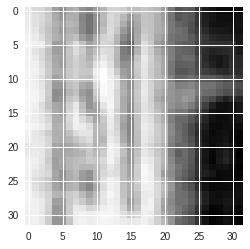

In [65]:
plt.imshow(X_test[0])

In [66]:
Y_test[0]

array([1], dtype=uint8)

In [67]:
Z_NoHidden_pred[0]

9

<h3>One hiddden layer with 100 nodes</h3>

In [68]:
#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32),))

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 1 Output after applying sigmoid
model1.add(tf.keras.layers.Dense(100, activation='relu'))

#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 1 Output after applying sigmoid
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)


#Compile the model
model1.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=25,
          batch_size=X_train.shape[1])

Y_1Hidden_pred = model1.predict(X_test)

Z_1Hidden_pred = []
for i in np.arange(0,Y_1Hidden_pred.shape[0]):
  Z_1Hidden_pred.append(np.argmax(Y_1Hidden_pred[i]))
 
print(accuracy_score(Y_test,Z_1Hidden_pred))
print(confusion_matrix(Y_test,Z_1Hidden_pred))
print(classification_report(Y_test,Z_1Hidden_pred))

Train on 42000 samples, validate on 18000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
42000/42000 [==============================] - 6s 137us/sample - loss: 2.2965 - acc: 0.1485 - val_loss: 2.2959 - val_acc: 0.1609
Epoch 2/25
42000/42000 [==============================] - 5s 128us/sample - loss: 2.2160 - acc: 0.2027 - val_loss: 2.2552 - val_acc: 0.1540
Epoch 3/25
42000/42000 [==============================] - 5s 130us/sample - loss: 2.2192 - acc: 0.2042 - val_loss: 2.2573 - val_acc: 0.1779
Epoch 4/25
42000/42000 [==============================] - 5s 127us/sample - loss: 2.2376 - acc: 0.1986 - val_loss: 2.2544 - val_acc: 0.1909
Epoch 5/25
42000/42000 [==============================] - 5s 128us/sample - loss: 2.2199 - acc: 0.2063 - val_loss: 2.2011 - val_acc: 0.2117
Epoch 6/25
42000/42000 [==============================] - 5s 109us/sample - loss: 2.1854 - acc: 0.2129 - val_loss: 2.1924 - val_acc: 0.1957
Epoch 7/25
42000/42000 [==============================] - 4s 1

<h3>Two Hidden layer Neural Network</h3>

In [69]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D
model2.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32),))


#Add Dense Layer which provides 1 Output after applying sigmoid
model2.add(tf.keras.layers.Dense(100, activation='relu'))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 1 Output after applying sigmoid
model2.add(tf.keras.layers.Dense(50, activation='relu'))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 1 Output after applying sigmoid
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model2.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=25,
          batch_size=32)

Y_2Hidden_pred = model2.predict(X_test)

Z_2Hidden_pred = []
for i in np.arange(0,Y_2Hidden_pred.shape[0]):
  Z_2Hidden_pred.append(np.argmax(Y_2Hidden_pred[i]))
 
print(accuracy_score(Y_test,Z_2Hidden_pred))
print(confusion_matrix(Y_test,Z_2Hidden_pred))
print(classification_report(Y_test,Z_2Hidden_pred))

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 6s 139us/sample - loss: 1.6944 - acc: 0.4349 - val_loss: 2.2729 - val_acc: 0.3091
Epoch 2/25
42000/42000 [==============================] - 5s 131us/sample - loss: 1.4503 - acc: 0.5208 - val_loss: 3.1812 - val_acc: 0.1676
Epoch 3/25
42000/42000 [==============================] - 5s 130us/sample - loss: 1.4780 - acc: 0.5141 - val_loss: 1.9791 - val_acc: 0.3523
Epoch 4/25
42000/42000 [==============================] - 5s 129us/sample - loss: 1.3667 - acc: 0.5540 - val_loss: 1.7672 - val_acc: 0.4297
Epoch 5/25
42000/42000 [==============================] - 5s 128us/sample - loss: 1.3048 - acc: 0.5799 - val_loss: 1.4485 - val_acc: 0.5315
Epoch 6/25
42000/42000 [==============================] - 5s 126us/sample - loss: 1.2787 - acc: 0.5896 - val_loss: 1.7214 - val_acc: 0.4516
Epoch 7/25
42000/42000 [==============================] - 5s 127us/sample - loss: 1.2524 - acc: 0.6009 - val_l

In [70]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               102500    
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 100)               400       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 50)                200       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 108,660
Trainable params: 108,360
Non-trainable params: 300
_________________________________________________________________


<h3>Three Hidden layer Neural Networks</h3>

In [71]:
#Initialize Sequential model
model3 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D
model3.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32),))


#Add Dense Layer which provides 1 Output after applying sigmoid
model3.add(tf.keras.layers.Dense(10000, activation='relu'))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 1 Output after applying sigmoid
model3.add(tf.keras.layers.Dense(1000, activation='relu'))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 1 Output after applying sigmoid
model3.add(tf.keras.layers.Dense(500, activation='relu'))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 1 Output after applying sigmoid
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 1 Output after applying sigmoid
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model3.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=25,
          batch_size=52)

Y_3Hidden_pred = model3.predict(X_test)

Z_3Hidden_pred = []
for i in np.arange(0,Y_3Hidden_pred.shape[0]):
  Z_3Hidden_pred.append(np.argmax(Y_3Hidden_pred[i]))
 
print(accuracy_score(Y_test,Z_3Hidden_pred))
print(confusion_matrix(Y_test,Z_3Hidden_pred))
print(classification_report(Y_test,Z_3Hidden_pred))

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 212s 5ms/sample - loss: 1.3564 - acc: 0.5531 - val_loss: 1.8899 - val_acc: 0.3652
Epoch 2/25
42000/42000 [==============================] - 211s 5ms/sample - loss: 1.2792 - acc: 0.5790 - val_loss: 2.9047 - val_acc: 0.1497
Epoch 3/25
42000/42000 [==============================] - 210s 5ms/sample - loss: 1.3608 - acc: 0.5515 - val_loss: 2.5132 - val_acc: 0.1808
Epoch 4/25
42000/42000 [==============================] - 208s 5ms/sample - loss: 1.2291 - acc: 0.6007 - val_loss: 2.4996 - val_acc: 0.2291
Epoch 5/25
42000/42000 [==============================] - 209s 5ms/sample - loss: 1.0829 - acc: 0.6518 - val_loss: 2.1582 - val_acc: 0.3621
Epoch 6/25
42000/42000 [==============================] - 210s 5ms/sample - loss: 1.0106 - acc: 0.6796 - val_loss: 1.6842 - val_acc: 0.4467
Epoch 7/25
42000/42000 [==============================] - 209s 5ms/sample - loss: 0.9621 - acc: 0.6944 - val_l

In [72]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10000)             10250000  
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 10000)             40000     
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              10001000  
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 1000)              4000      
_________________________________________________________________
dense_8 (Dense)              (None, 500)               500500    
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 500)               2000      
__________